Business Context
-	We aim to help a financial services provider gain deeper insights into its credit card customer segments. By clustering customers based on their purchasing patterns and payment behaviors, this analysis provides actionable insights that allow the company to design more tailored products and services. This targeted approach to customer segmentation is expected to improve customer satisfaction, increase revenues, and optimize resource allocation for the company.
-	Understanding customer payment behavior is crucial for the company to manage financial risk effectively. Customers’ spending patterns can significantly influence their repayment behaviors; for instance, higher spending might increase the likelihood of defaults or partial payments, which poses a greater risk. Analyzing these behaviors enables the company to assess the credit risk associated with different customer segments. Customers who frequently make only minimum payments could represent a higher risk, as they may be more likely to accumulate debt. Identifying these high-risk customers early helps the company implement proactive risk mitigation strategies, such as offering financial counseling or restructuring payment plans.
-	By better understanding customers’ purchasing habits, the company can also create more effective marketing strategies, such as offering targeted rewards or credit card promotions to high-value customers. For this analysis, we focused on spending and payment behavior and selected 11 features from an original set of 18 to perform customer clustering. These features allow us to categorize customers based on behaviors for risk assessment, targeted marketing, and tailored financial product offerings.

-	Since we are now focusing on spending and payments areas, we extracted 11 features out of 18 features to process the customer clustering as a new data frame for further analysis.
  - Defined variables:
    - Spending patterns: ‘PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY','PURCHASES_TRX'
    - 'Payment behaviors: 'CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'


Data Cleaning
-	The missing values were checked in the dataset, with 313 missing values in MINIMUM_PAYMENTS and 1 missing in CREDIT_LIMIT. We used the imputation technique to solve 313 missing based on the definition of MINIMUM_PAYMENTS. If the PAYMENTS is zero, meaning the user did not make any payment, the MINIMUM_PAYMENTS should also be zero. For the rest of the missing values, we impute the median of PAYMENTS to it. Since there is only one missing value in the CREDIT_LIMIT, we just dropped the row for that.
- Extracted 11 related variables we defined for business context as a new data frame ‘df1’ for EDA and Modeling


Data Exploration Summary

- Many features like PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CREDIT_LIMIT, MINIMUM_PAYMENTS, and PAYMENTS exhibit right-skewed distributions, which indicates most customers are in the lower value range. A very small number of users have extreme values in the features we selected.
  - From the purchasing features, most customers made low total/one-off purchases, and high spending/one-time purchases are rare. Installment purchases are uncommon or low for most customers, with occasional larger values. Most customers make relatively few transactions, while a few are more frequent buyers.
  - Most customers have relatively low credit limits below $10,000, and a few have high credit limits. This likely indicates that high limits are very small portions and likely reserved for specific, creditworthy customers.
  - MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, and PAYMENTS indicate that customers generally don’t carry large outstanding balances. Many customers rarely pay their full balance, possibly indicating a reliance on the credit. Most customers make smaller payments, but a few have made substantial payments, perhaps to reduce large balances.
- PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY and PURCHASES_TRX demonstrated that distinct groups of frequent and infrequent buyers, one-off purchases are generally infrequent, most customers rarely use installment options and majority of customers make relatively few transactions. At the same time, a small number of clients are more frequent purchasers.

- From the boxplots of extracted variables, it is very clear that most features (e.g., PURCHASES, ONEOFF_PURCHASES, CREDIT_LIMIT) have extreme outliers, indicating a small number of customers with extreme behaviors in these areas. The median also sits in the low-value area, suggesting that most customers exhibit low values for these metrics while a few have high values. The frequency features (PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY) show varying distributions, suggesting different buying behaviors among customers, from frequent to infrequent.
- In this dataset, the outliers represent high-value or atypical behaviors, such as very high spending or significant credit limits. These data points reflect real-world differences among customers, including those who may be exceptionally wealthy or have unique spending habits. In real-world scenarios, high-spending individuals or 'rich customers' are not uncommon and are often important to analyze separately, as they can represent valuable customer segments. Removing or modifying these outliers would potentially overlook a critical segment of customers who contribute significantly to overall revenue or have unique service needs. Therefore, to ensure our analysis reflects the full spectrum of customer behaviors, we have decided to retain these outliers in the dataset


- From the Heatmap of features correlation:
  - High Correlations: PURCHASES and ONEOFF_PURCHASES have a strong positive correlation (0.92), indicating that customers who spend more overall tend to make large one-time purchases. PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY are also highly correlated (0.86), suggesting that frequent buyers often use installment purchases.
  - Moderate Correlations: PURCHASES_TRX (number of transactions) shows moderate correlations with PURCHASES (0.69) and ONEOFF_PURCHASES (0.55), indicating that higher total purchase amounts are generally associated with more transactions. CREDIT_LIMIT has a moderate correlation with PAYMENTS (0.42), which suggests that customers with higher credit limits tend to make larger payments.
  - Low or Negligible Correlations: Features like MINIMUM_PAYMENTS and PRC_FULL_PAYMENT show very low correlations with most other variables, implying that they are relatively independent of other purchasing and credit behaviors.


Dimensionality Reduction for Modeling

-	Based on the correlation heatmap, some features are highly correlated with each other and contain overlapping information. Therefore, we applied PCA to combine these correlated features to reduce the redundancy by creating uncorrelated variables. This can reduce noise in the data and improve the performance and computational efficiency for the clustering models.
-	As we want PCA to capture most of the information in the data, we set a threshold at 90% cumulative variance. From the plot, it indicates that the first four principal components together explained at least 90% of the total variance. So we selected components = 4 for the dimensionality reduction. To make sure the correlation between the 4 principle components are uncorrelated, a correlation map was plotted for testing.

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import plotly.express as px


In [15]:
df = pd.read_csv('C:/Users/User/Desktop/Customer_Data.csv')

In [16]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [18]:
# Check number of unknowns
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [19]:
#missing value in Minimum Payments fill in zero if payment is zero, otherwise with the mean of payments
df['MINIMUM_PAYMENTS'] = df.apply(
    lambda row: 0 if row['PAYMENTS'] == 0 else (df['PAYMENTS'].median() if pd.isnull(row['MINIMUM_PAYMENTS']) else row['MINIMUM_PAYMENTS']),
    axis=1
)

In [20]:
#missing value in credit_limit
df = df.dropna(subset=['CREDIT_LIMIT'])

In [21]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [22]:
df1 = df[['PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
'PURCHASES_INSTALLMENTS_FREQUENCY','PURCHASES_TRX','CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']]

Exploratory Data Analysis (EDA)

In [23]:
df1.describe()

,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1003.316936,592.503572,411.113579,0.490405,0.202480,0.364478,14.711476,4494.449450,1733.336511,841.065069,0.153732
std,2136.727848,1659.968851,904.378205,0.401360,0.298345,0.397451,24.858552,3638.815725,2895.168146,2334.879763,0.292511
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000
25%,39.800000,0.000000,0.000000,0.083333,0.000000,0.000000,1.000000,1600.000000,383.282850,164.687639,0.000000
50%,361.490000,38.000000,89.000000,0.500000,0.083333,0.166667,7.000000,3000.000000,857.062706,299.935043,0.000000
75%,1110.170000,577.830000,468.650000,0.916667,0.300000,0.750000,17.000000,6500.000000,1901.279320,819.267218,0.142857
max,49039.570000,40761.250000,22500.000000,1.000000,1.000000,1.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000


Error in callback <function _draw_all_if_interactive at 0x000002BADB2D0F40> (for post_execute):


KeyboardInterrupt: 

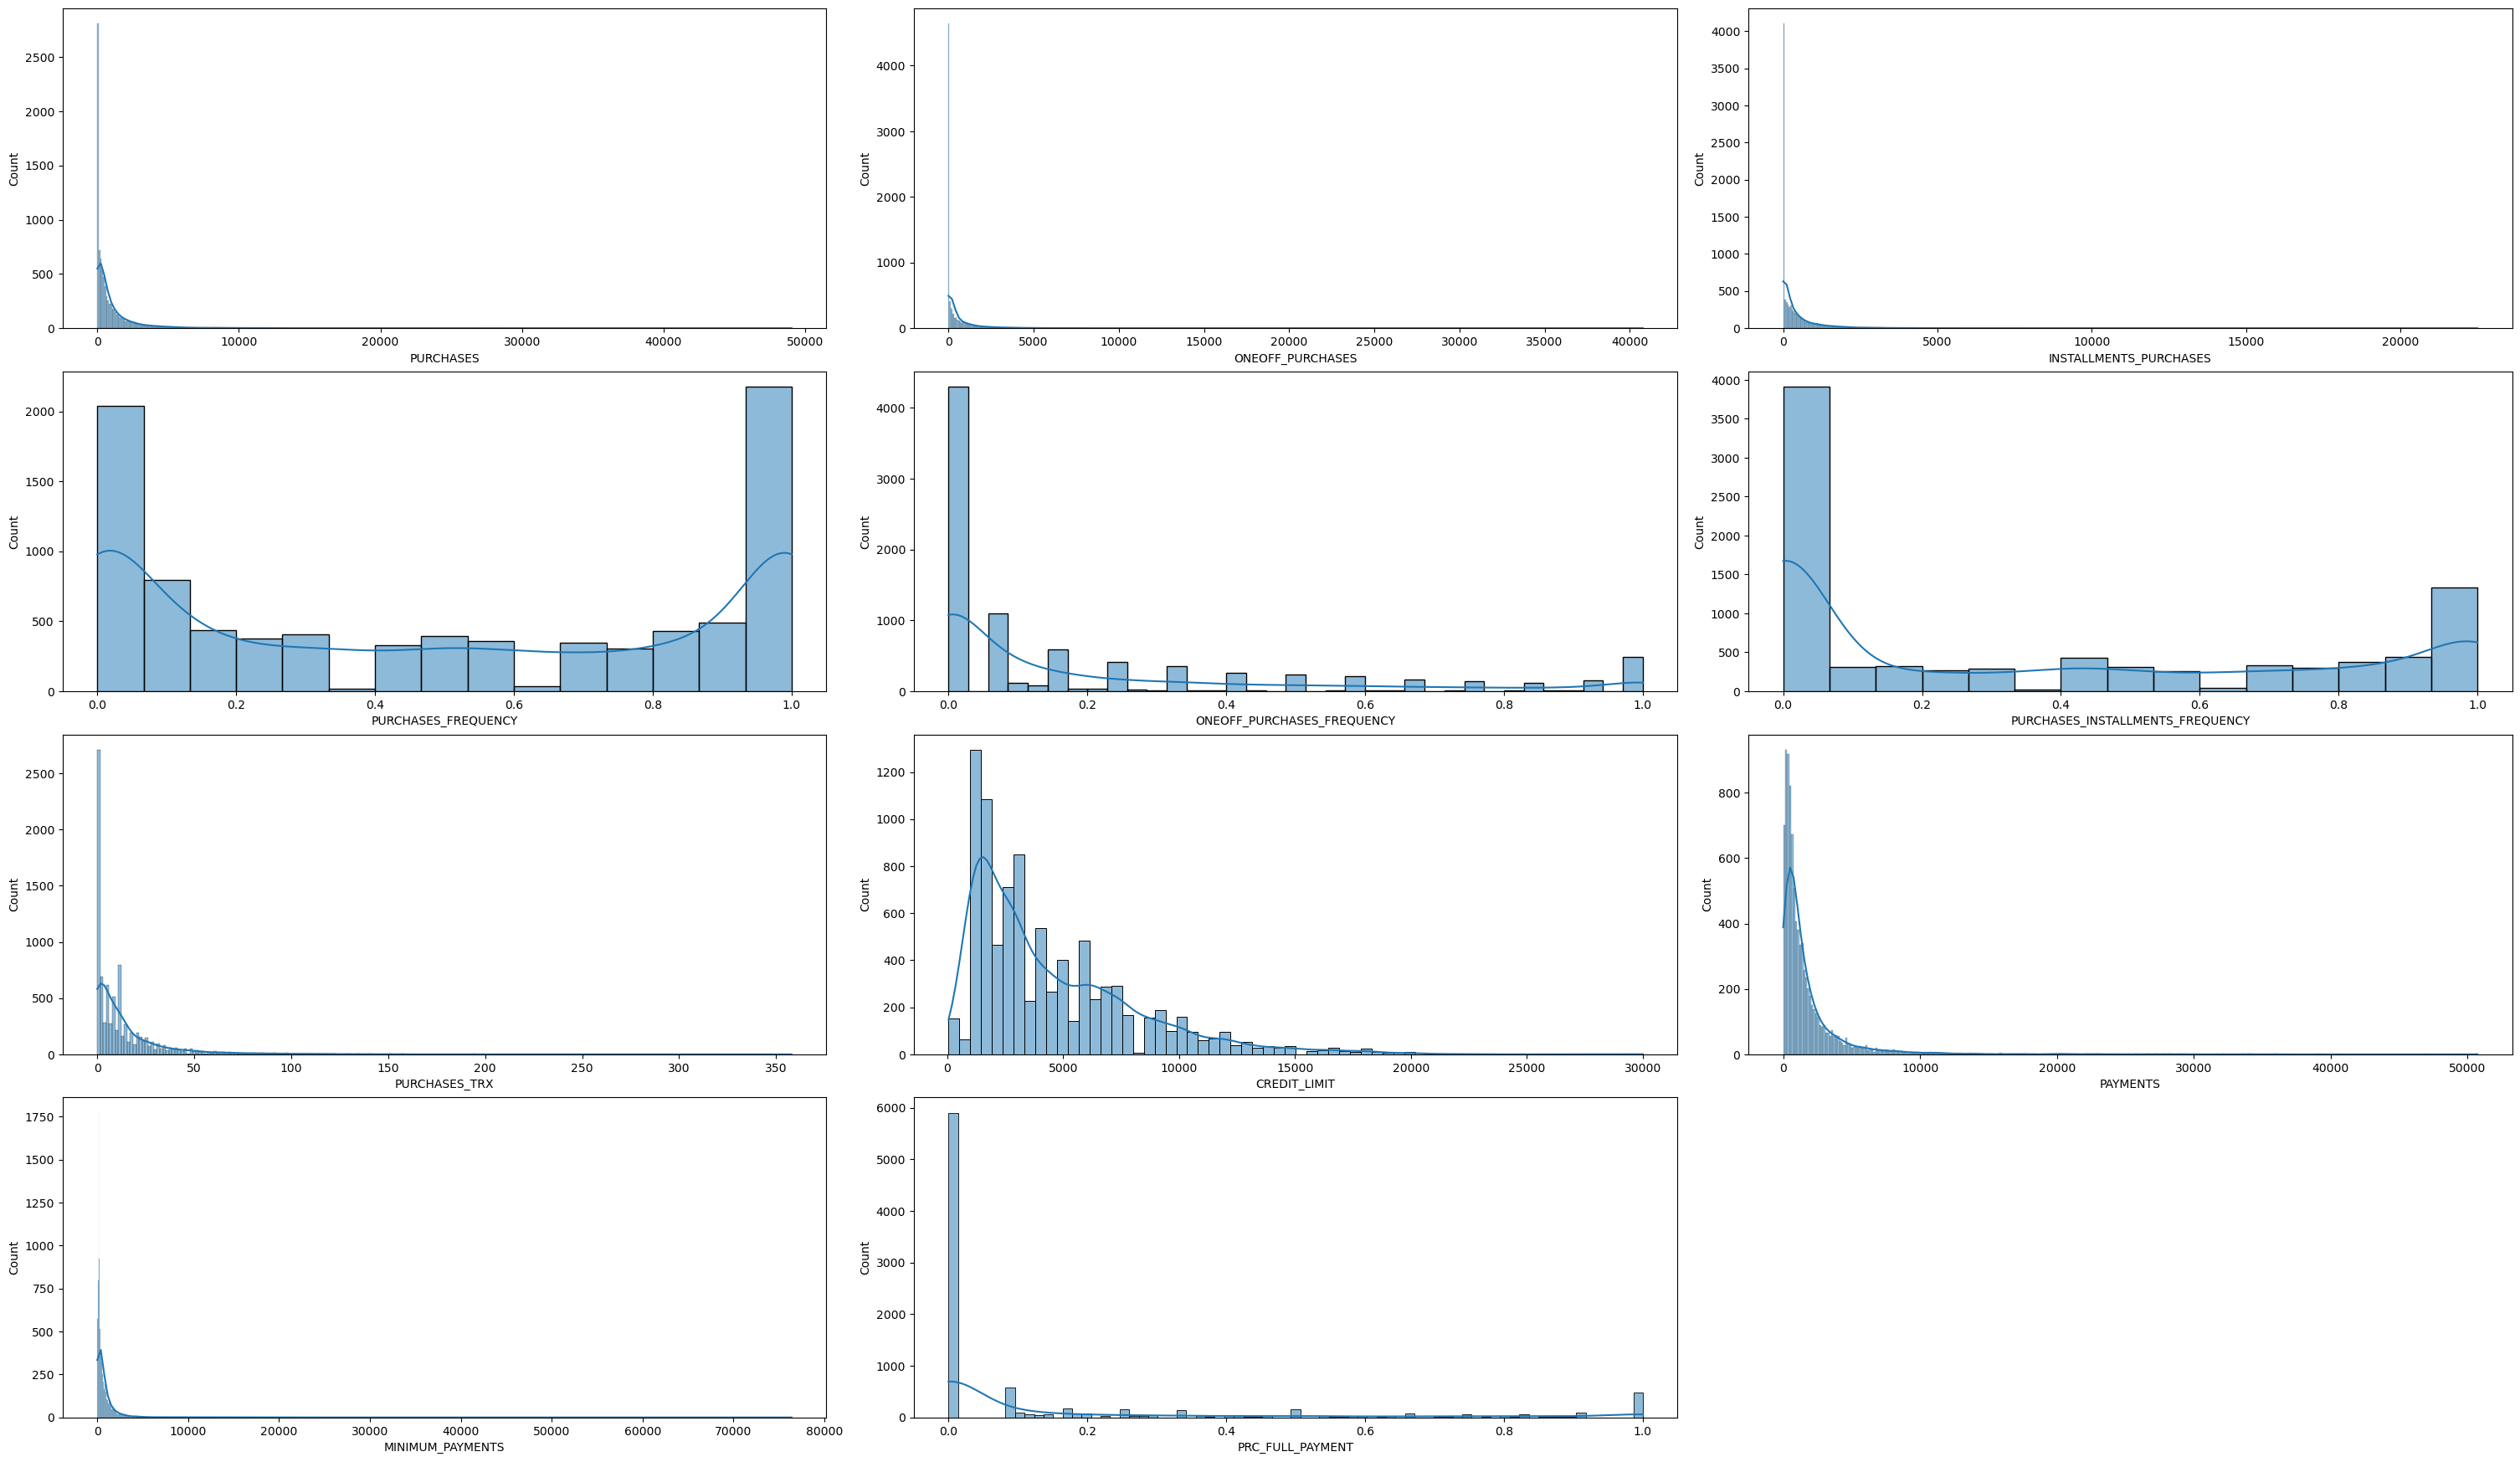

In [13]:
# creating distribution plot for analysis
fig = plt.figure(figsize=(30, 25), constrained_layout=True)
for i in range(len(df1.columns)):
    plt.subplot(6, 3, i+1)
    sns.histplot(df1[df1.columns[i]], kde=True)

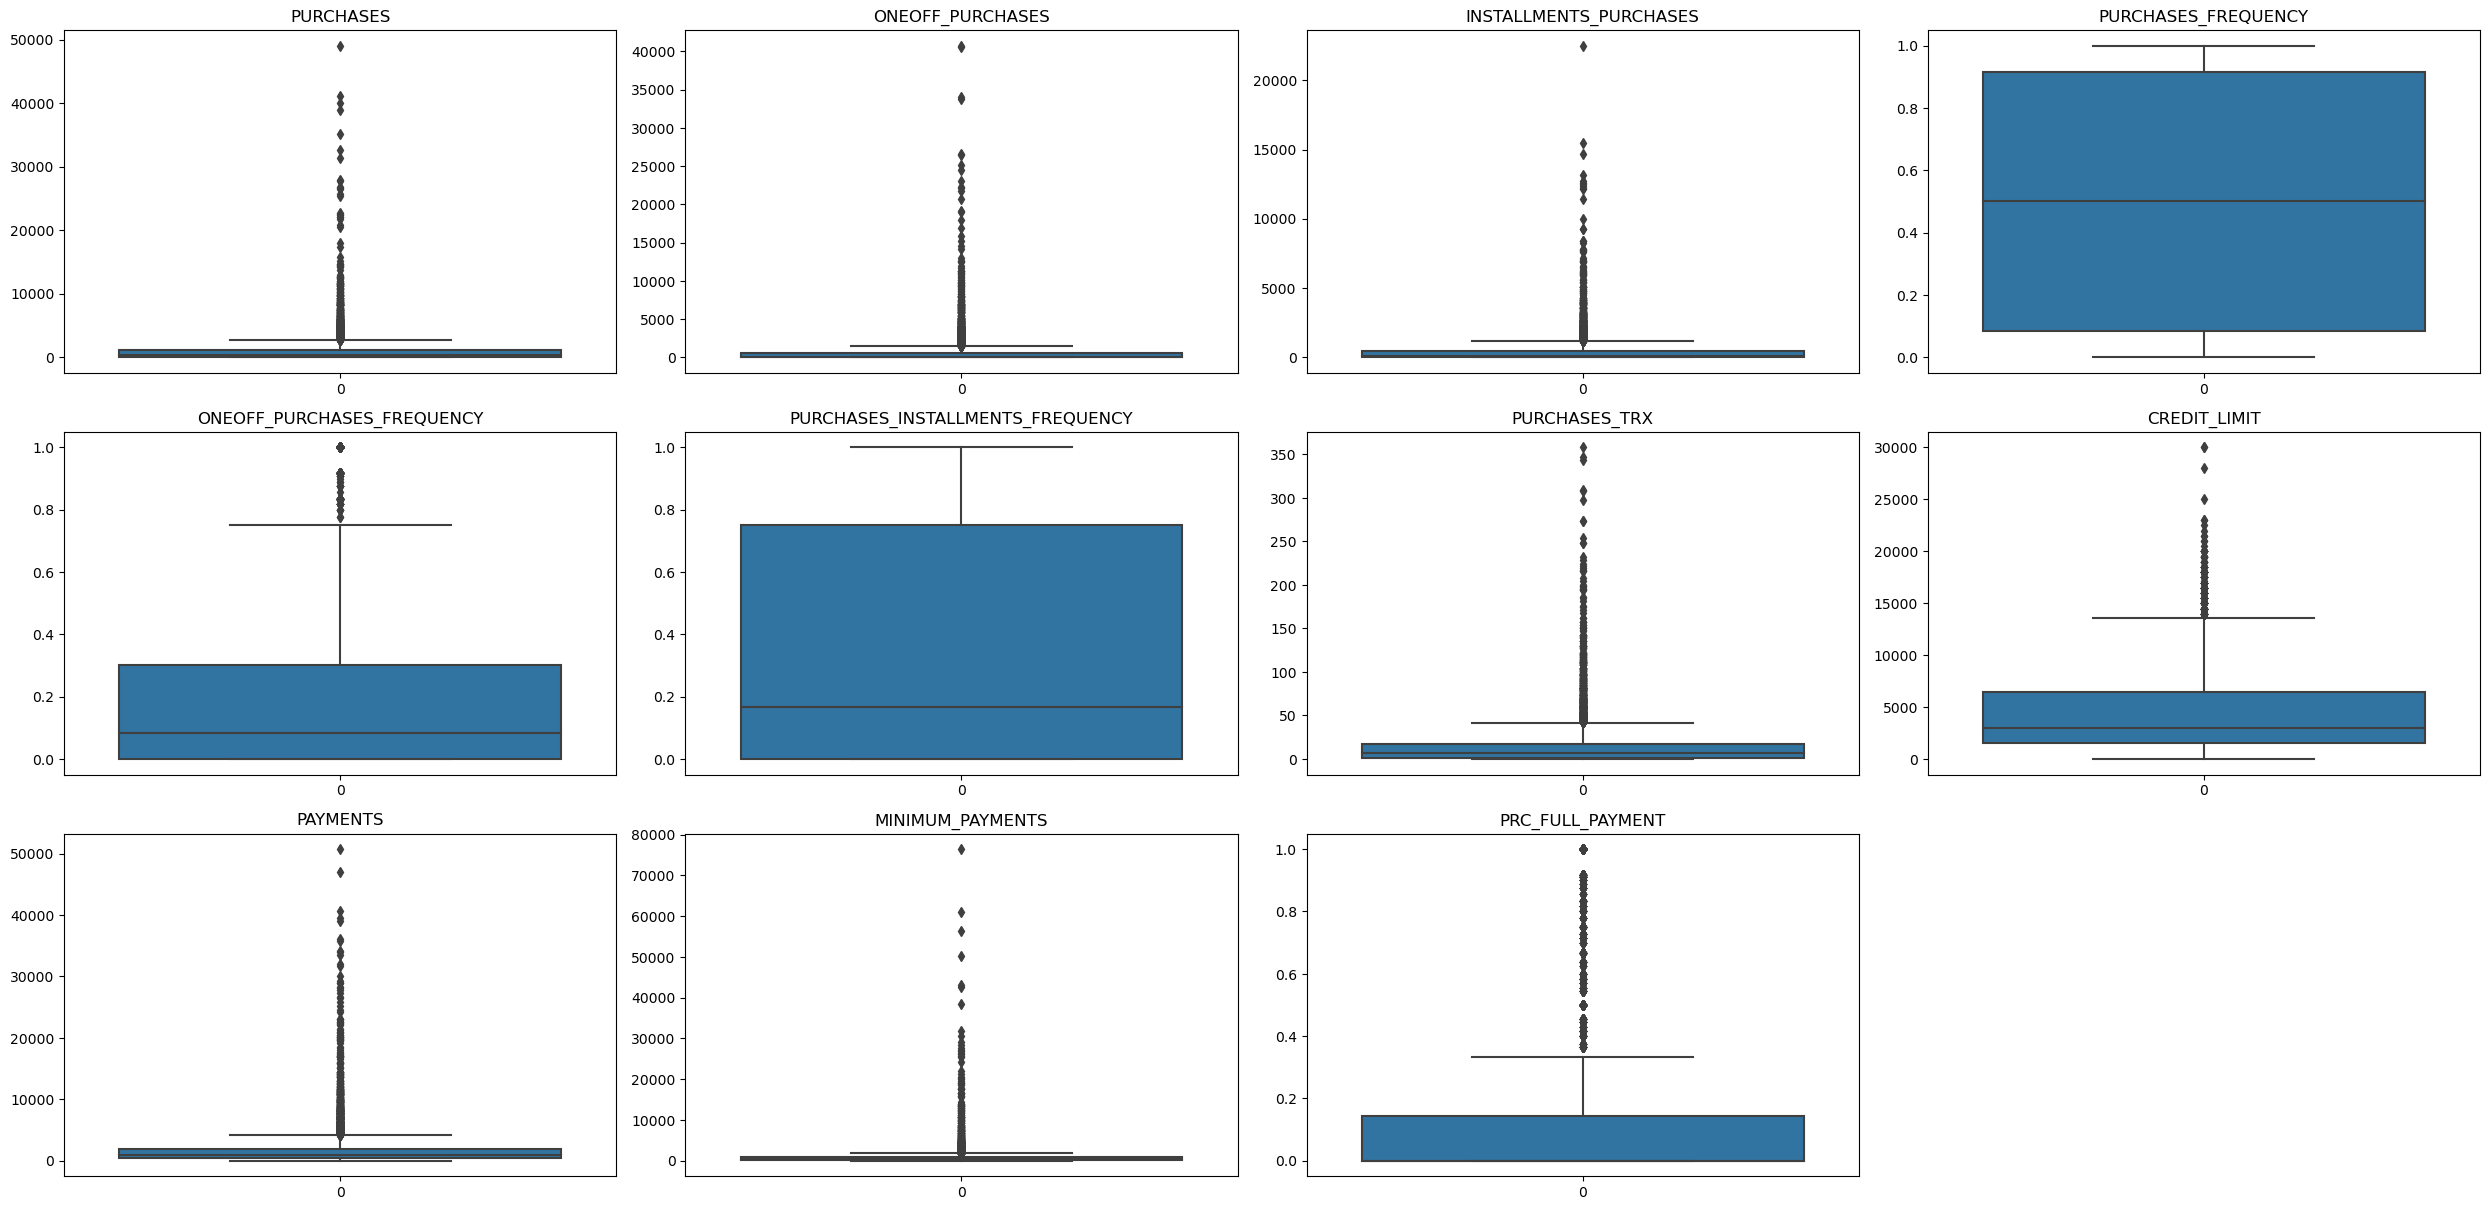

In [24]:
# plot for outliers detection

plt.figure(figsize=(25,20))
for i in range(len(df1.columns)):
    plt.subplot(5,4,i+1)
    sns.boxplot(df1[df1.columns[i]])
    plt.title(df1.columns[i])
    
plt.tight_layout()

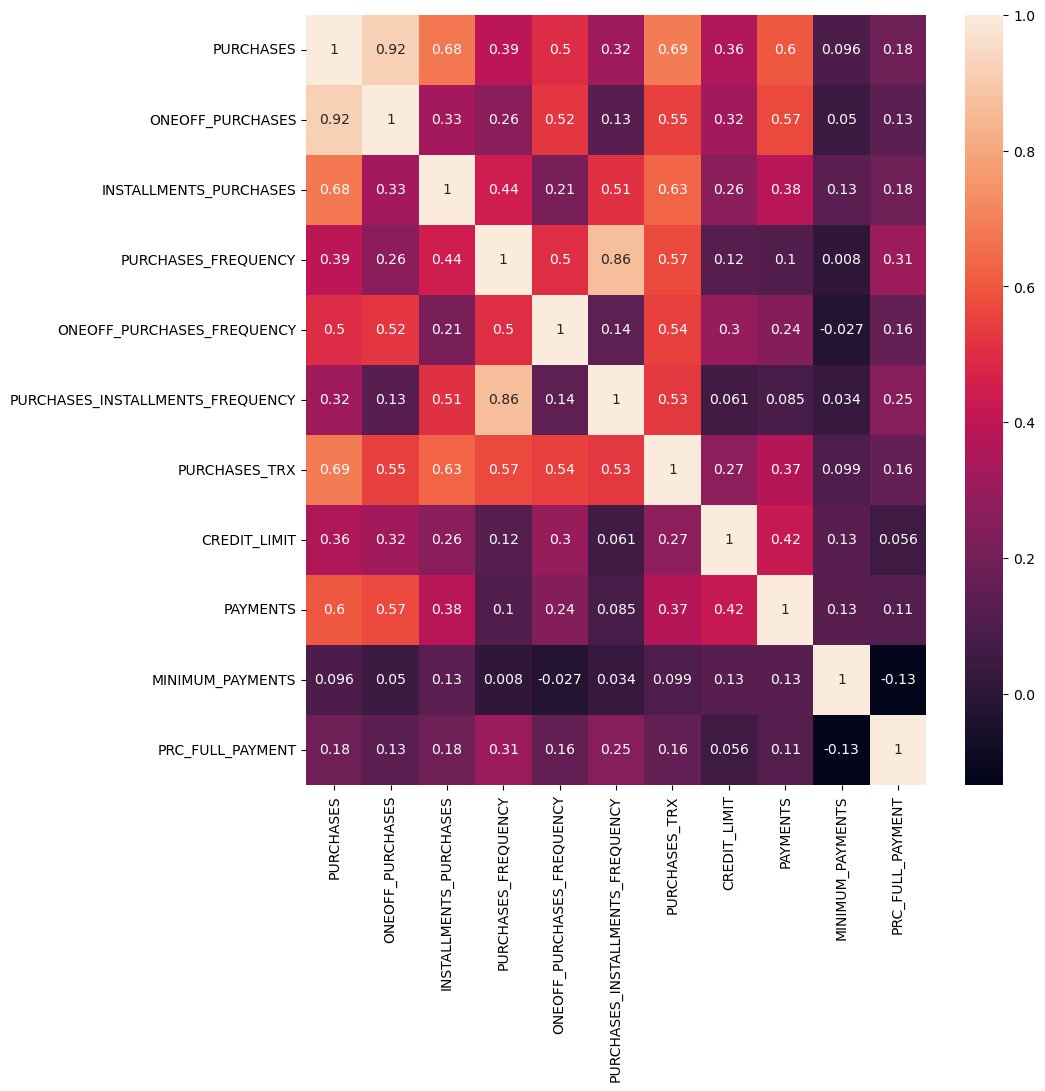

In [25]:
# calculates the correlations
correlation = df1.corr(method='pearson')

# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(10, 10)
sns.heatmap(correlation, annot=True);

# displays the plot
plt.show()

In [26]:
# Step 1: Feature Scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df1)

In [27]:
scaled_columns = pd.DataFrame(data_scaled)
scaled_columns

,0,1,2,3,4,5,6,7,8,9,10
0,0.001945,0.000000,0.004240,0.166667,0.000000,0.083333,0.005587,0.031720,0.003979,0.001826,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.232053,0.080893,0.014035,0.222222
2,0.015766,0.018968,0.000000,1.000000,1.000000,0.000000,0.033520,0.248748,0.012264,0.008210,0.000000
3,0.030567,0.036775,0.000000,0.083333,0.083333,0.000000,0.002793,0.248748,0.000000,0.000000,0.000000
4,0.000326,0.000393,0.000000,0.083333,0.083333,0.000000,0.002793,0.038397,0.013374,0.003204,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
8944,0.005936,0.000000,0.012939,1.000000,0.000000,0.833333,0.016760,0.031720,0.006419,0.000640,0.500000
8945,0.006118,0.000000,0.013333,1.000000,0.000000,0.833333,0.016760,0.031720,0.005439,0.011215,0.000000
8946,0.002945,0.000000,0.006418,0.833333,0.000000,0.666667,0.013966,0.031720,0.001602,0.001079,0.250000
8947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015025,0.001036,0.000730,0.250000


Modeling
- K-MEANS
- DBSCAN
- K-Meoids

K-means

In [28]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Handling Warning
import warnings
warnings.filterwarnings('ignore')

In [29]:
inertia = []
silh = []

for i in range(2,10):
    kmeans = KMeans(n_clusters = i) 
    kmeans.fit(scaled_columns)
    inertia.append(kmeans.inertia_)
    silh.append(silhouette_score(scaled_columns, kmeans.labels_))

  File "c:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


In [30]:
inertia

[2287.174193985623,
 1714.1544494554137,
 1401.0754316091266,
 1183.4086998844102,
 1017.9824592871585,
 888.6255901481796,
 762.2925652133658,
 686.954425276195]

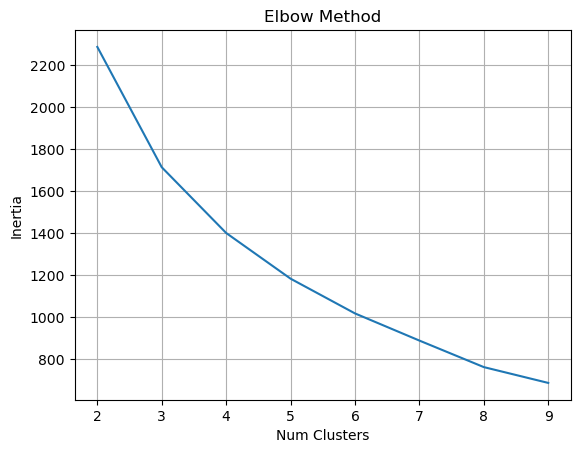

In [31]:
plt.plot(range(2,10), inertia)
plt.title('Elbow Method')
plt.xlabel('Num Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

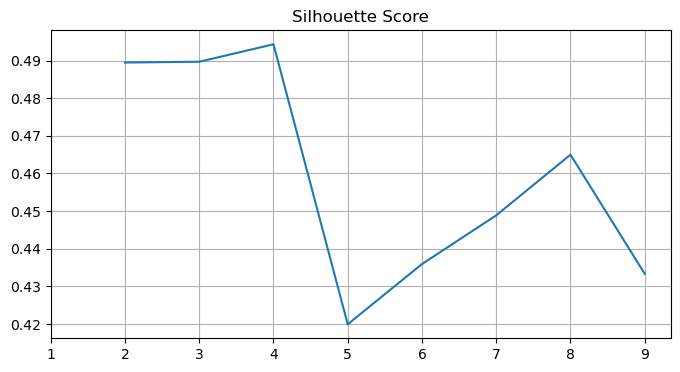

In [32]:
plt.figure(figsize = (8,4))
plt.plot(range(2,10), silh)
plt.title('Silhouette Score')
plt.xticks(range(1,10))
plt.grid()
plt.show()

In [33]:
# Choosing cluster 
kmeans = KMeans(n_clusters=4, random_state=22)
kmeans.fit(scaled_columns)
kmeans_labels = kmeans.labels_

DBSCAN

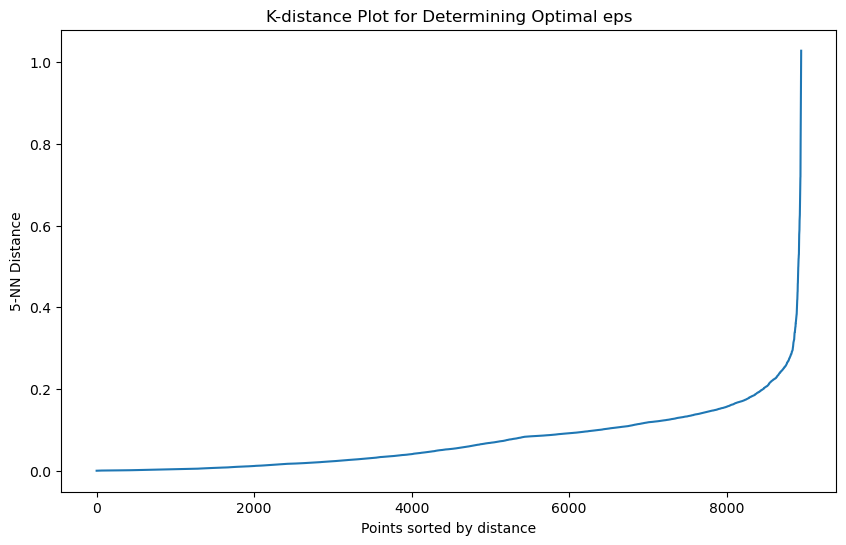

In [34]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Set the number of neighbors to min_samples
min_samples = 5
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(data_scaled) 
distances, indices = neighbors_fit.kneighbors(data_scaled)

# Sort the distances and plot them
distances = np.sort(distances[:, min_samples - 1])  # Only take the distance to the k-th neighbor
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{min_samples}-NN Distance")
plt.title("K-distance Plot for Determining Optimal eps")
plt.show()

In [35]:
eps = 0.2  
dbscan = DBSCAN(eps=eps,min_samples=6) 

dbscan_model = dbscan.fit(scaled_columns)
dbscan_labels = dbscan_model.labels_


# Check the number of unique clusters
unique_clusters = set(dbscan_labels)
print(f"Number of clusters found: {len(unique_clusters)}")
print(f"Cluster labels: {unique_clusters}")

Number of clusters found: 3
Cluster labels: {0, 1, -1}


K-Medoids

In [36]:
inertia = []
silh = []

for i in range(2,10):
    kmedoids = KMedoids(n_clusters = i) 
    kmedoids.fit(scaled_columns)
    inertia.append(kmedoids.inertia_)
    silh.append(silhouette_score(scaled_columns, kmedoids.labels_))

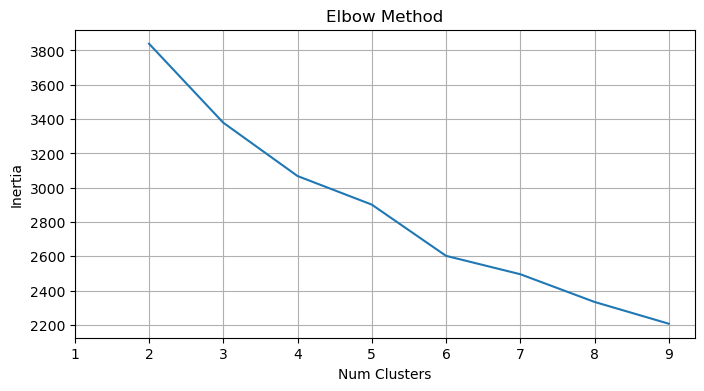

In [37]:
plt.figure(figsize = (8,4))
plt.plot(range(2,10), inertia)
plt.title('Elbow Method')
plt.xlabel('Num Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1,10))
plt.grid()
plt.show()

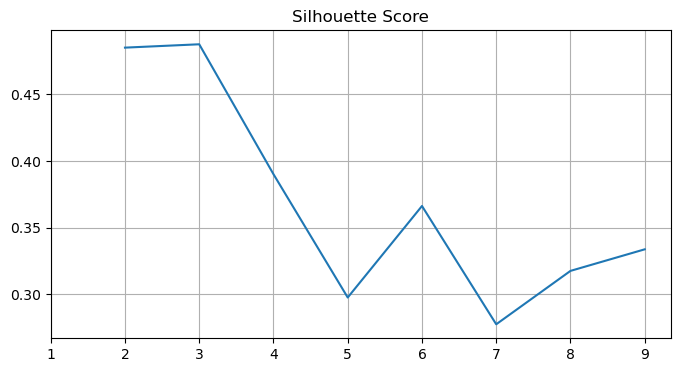

In [38]:
plt.figure(figsize = (8,4))
plt.plot(range(2,10), silh)
plt.title('Silhouette Score')
plt.xticks(range(1,10))
plt.grid()
plt.show()

In [39]:
# Final decision on numbers of cluster chosen: 3

kmedoids = KMedoids(n_clusters = 3)
kmedoids.fit(scaled_columns)
kmedoids_labels = kmedoids.labels_

Evaluation

In [40]:
# K-Means silhouette score
kmeans_silhouette = silhouette_score(scaled_columns.iloc[:, :11], kmeans_labels)
print("K-Means Silhouette Score:", kmeans_silhouette)

# DBSCAN silhouette score
dbscan_silhouette = silhouette_score(scaled_columns.iloc[:, :11], dbscan_labels)
print("DBSCAN Silhouette Score:", dbscan_silhouette)

# For K-Medoids
kmedoids_silhouette = silhouette_score(scaled_columns.iloc[:, :11], kmedoids_labels)
print("K-Medoids Silhouette Score:", kmedoids_silhouette)

K-Means Silhouette Score: 0.49425077659935657
DBSCAN Silhouette Score: 0.1945810391758006
K-Medoids Silhouette Score: 0.4876732970353098


In [41]:
# Count of clusters and noise in DBSCAN
unique_clusters_dbscan = pd.Series(dbscan_labels).value_counts()
print("DBSCAN Cluster Distribution:\n", unique_clusters_dbscan)

# Count of clusters in K-Means
unique_clusters_kmeans = pd.Series(kmeans_labels).value_counts()
print("K-Means Cluster Distribution:\n", unique_clusters_kmeans)

# K-Medoids cluster distribution
unique_clusters_kmedoids = pd.Series(kmedoids_labels).value_counts()
print("K-Medoids Cluster Distribution:\n", unique_clusters_kmedoids)

DBSCAN Cluster Distribution:
  0    8619
-1     324
 1       6
Name: count, dtype: int64
K-Means Cluster Distribution:
 1    4613
2    2219
0    1240
3     877
Name: count, dtype: int64
K-Medoids Cluster Distribution:
 2    4525
1    3048
0    1376
Name: count, dtype: int64


In [44]:
print("K-Means Inertia:", kmeans.inertia_)

print("K-Medoids Inertia:", kmedoids.inertia_)

K-Means Inertia: 1401.0771137565519
K-Medoids Inertia: 3378.919282106072


In [45]:
from sklearn.metrics import davies_bouldin_score

# K-Means DBI
kmeans_dbi = davies_bouldin_score(scaled_columns.iloc[:, :11], kmeans_labels)
print("K-Means Davies-Bouldin Index:", kmeans_dbi)

# DBSCAN DBI
dbscan_dbi = davies_bouldin_score(scaled_columns.iloc[:, :11], dbscan_labels)
print("DBSCAN Davies-Bouldin Index:", dbscan_dbi)

# K-Medoids DBI
kmedoids_dbi = davies_bouldin_score(scaled_columns.iloc[:, :11], kmedoids_labels)
print("K-Medoids Davies-Bouldin Index:", kmedoids_dbi)


K-Means Davies-Bouldin Index: 1.01036478280241
DBSCAN Davies-Bouldin Index: 1.8320947353069197
K-Medoids Davies-Bouldin Index: 1.148959570119965


K-Means is the best

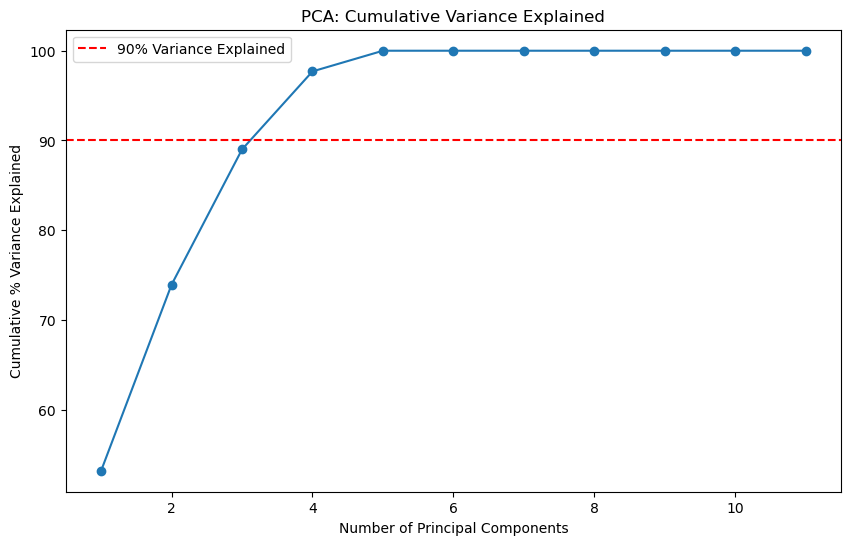

In [46]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(n_components=len(df1.columns))
pca.fit(df1)

# Calculate the cumulative variance explained by each component
variance_explained = np.cumsum(pca.explained_variance_ratio_) * 100

# Plot the cumulative variance explained
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variance_explained) + 1), variance_explained, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative % Variance Explained')
plt.title('PCA: Cumulative Variance Explained')
plt.axhline(y=90, color='r', linestyle='--', label='90% Variance Explained')
plt.legend()
plt.show()

In [47]:
# Use PCA to keep enough components to explain at least 90% of the variance
pca = PCA(n_components=0.9)  # Retain components explaining 90% variance
pca_data = pca.fit_transform(df1)

print(f"Number of components explaining 90% variance: {pca.n_components_}")

Number of components explaining 90% variance: 4


In [48]:
# 假设 df 是原始数据集
# Step 1: 聚类
df2 = pd.DataFrame(data_scaled)
df2['Cluster'] = kmeans_labels

# Step 2: 对每个聚类进行PCA
pca_results = {}

for cluster_label in df2['Cluster'].unique():
    # 提取当前聚类的数据，去除 'Cluster' 列
    cluster_data = df2[df2['Cluster'] == cluster_label].drop(columns=['Cluster'])
    
    # 对该聚类的数据做PCA
    pca = PCA(n_components=4)  # 选择适当的主成分数
    cluster_pca = pca.fit_transform(cluster_data)
    
    # 存储PCA结果
    pca_results[cluster_label] = {
        'explained_variance_ratio': pca.explained_variance_ratio_,
        'components': pca.components_,
        'loadings': pd.DataFrame(pca.components_, columns=cluster_data.columns, index=[f'PC{i+1}' for i in range(4)])
    }

# Step 3: 查看每个聚类的PCA特征
for cluster_label, pca_info in pca_results.items():
    print(f"\nCluster {cluster_label} PCA Analysis:")
    print("Explained Variance Ratio:", pca_info['explained_variance_ratio'])
    print("Loadings (Top Variables for Each PC):")
    print(pca_info['loadings'])


Cluster 1 PCA Analysis:
Explained Variance Ratio: [0.47171392 0.18612384 0.16282728 0.13760847]
Loadings (Top Variables for Each PC):
            0         1         2         3         4         5         6  \
PC1  0.030747  0.028896  0.014703  0.806218  0.475467  0.342902  0.046030   
PC2 -0.007002 -0.015941  0.013592  0.014590 -0.285911  0.268258 -0.006365   
PC3  0.025023  0.042560 -0.022532 -0.101164  0.602801 -0.658929  0.007303   
PC4  0.014776  0.011018  0.012269 -0.002415 -0.140440  0.131114 -0.002727   

            7         8         9        10  
PC1  0.028964 -0.006035 -0.004867  0.036720  
PC2 -0.003894  0.095912 -0.015667  0.914380  
PC3  0.196930  0.097706  0.001083  0.375342  
PC4  0.958727  0.179301  0.044987 -0.096190  

Cluster 0 PCA Analysis:
Explained Variance Ratio: [0.43014574 0.33668061 0.09144881 0.0730329 ]
Loadings (Top Variables for Each PC):
            0         1         2         3         4         5         6  \
PC1  0.094252  0.064442  0.088682  0.

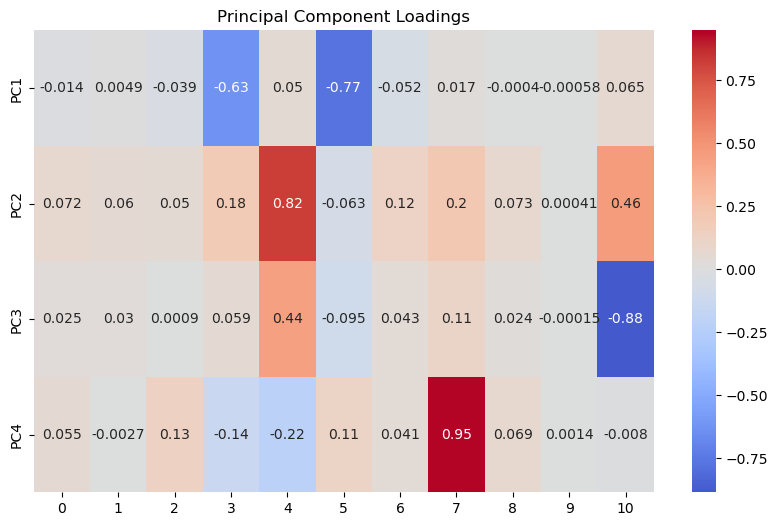

In [49]:
loadings = pd.DataFrame(pca.components_, columns=cluster_data.columns, index=[f'PC{i+1}' for i in range(4)])

plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title("Principal Component Loadings")
plt.show()

In [50]:
pca_columns = pd.DataFrame(cluster_pca, columns=[f'PC{i+1}' for i in range(4)])
pca_columns

,PC1,PC2,PC3,PC4
0,-0.375761,0.547685,0.143678,-0.132110
1,0.371019,-0.064921,-0.214464,-0.066288
2,0.726031,-0.059973,-0.186420,0.120584
3,0.353538,0.345172,0.000837,-0.066275
4,0.777632,-0.071487,-0.190423,0.137232
...,...,...,...,...
872,-0.262910,-0.004938,-0.226205,-0.099336
873,0.171726,-0.272924,0.229328,-0.070437
874,-0.280143,-0.117673,-0.004615,-0.093147
875,-0.263730,-0.002941,-0.225816,-0.096133


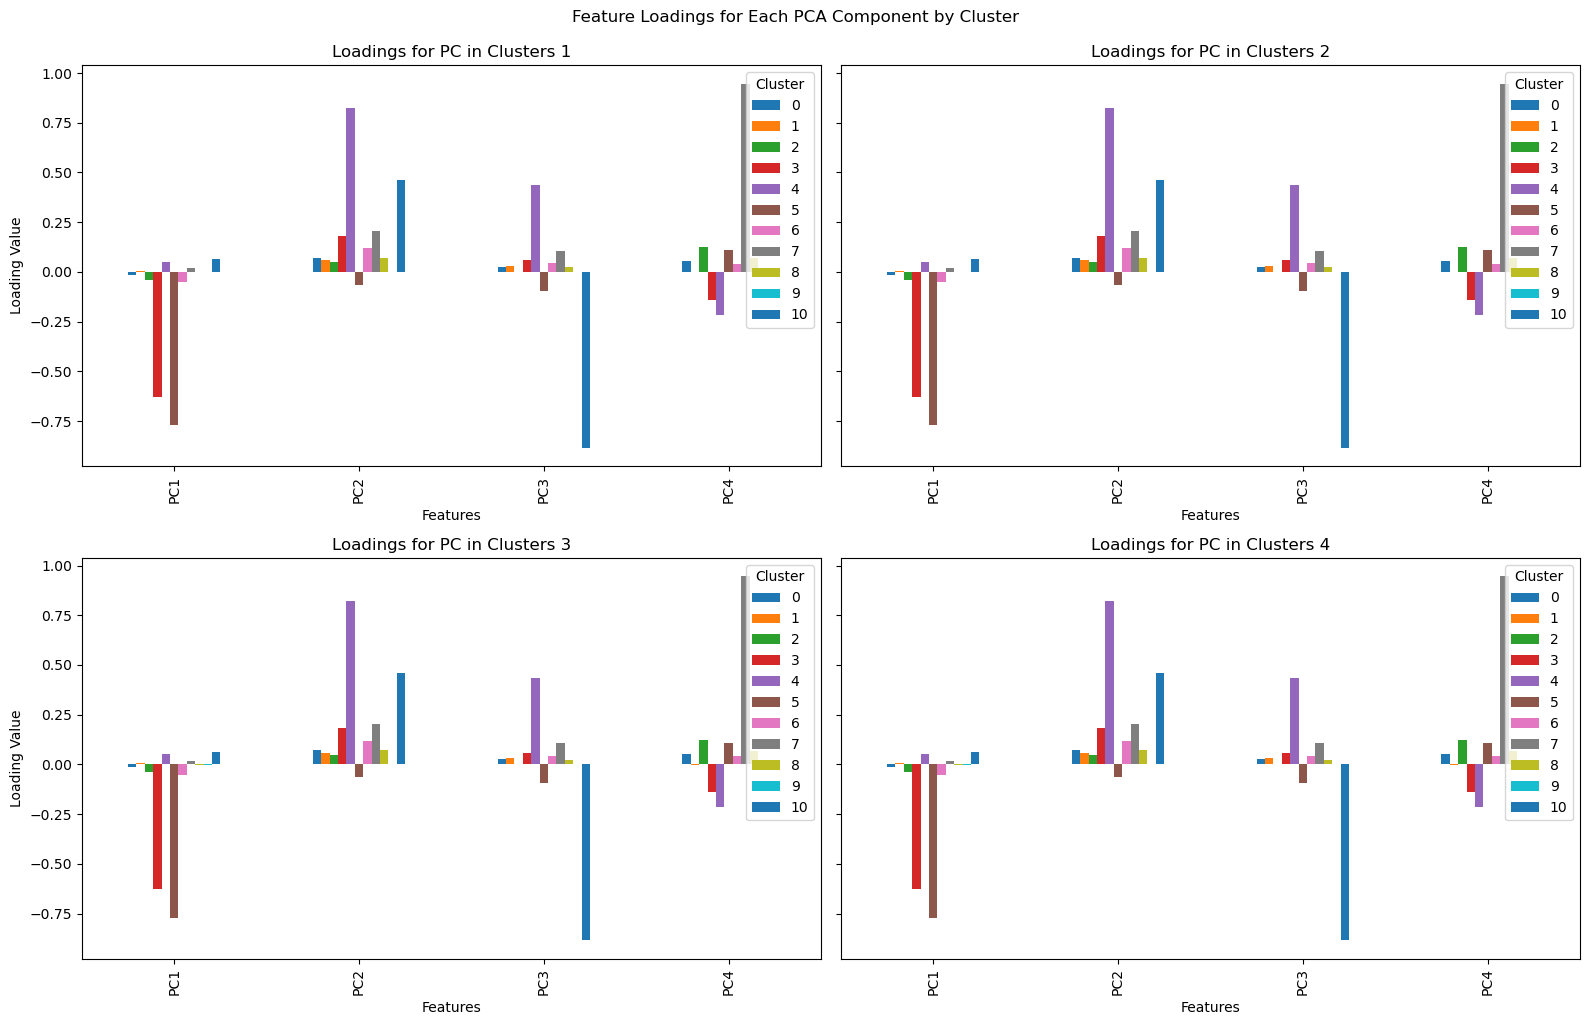

In [51]:
# Plot the loadings for each PC across clusters
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True)

for i, ax in enumerate(axes.flat):
    component_name = f'PC{i+1}'
    data = loadings
    
    # Plot the data for each principal component
    data.plot(kind='bar', ax=ax)
    ax.set_title(f'Loadings for PC in Clusters {i+1}')
    ax.set_ylabel("Loading Value")
    ax.set_xlabel("Features")
    ax.legend(title="Cluster", loc="upper right")

plt.tight_layout()
plt.suptitle('Feature Loadings for Each PCA Component by Cluster', y=1.02)
plt.show()

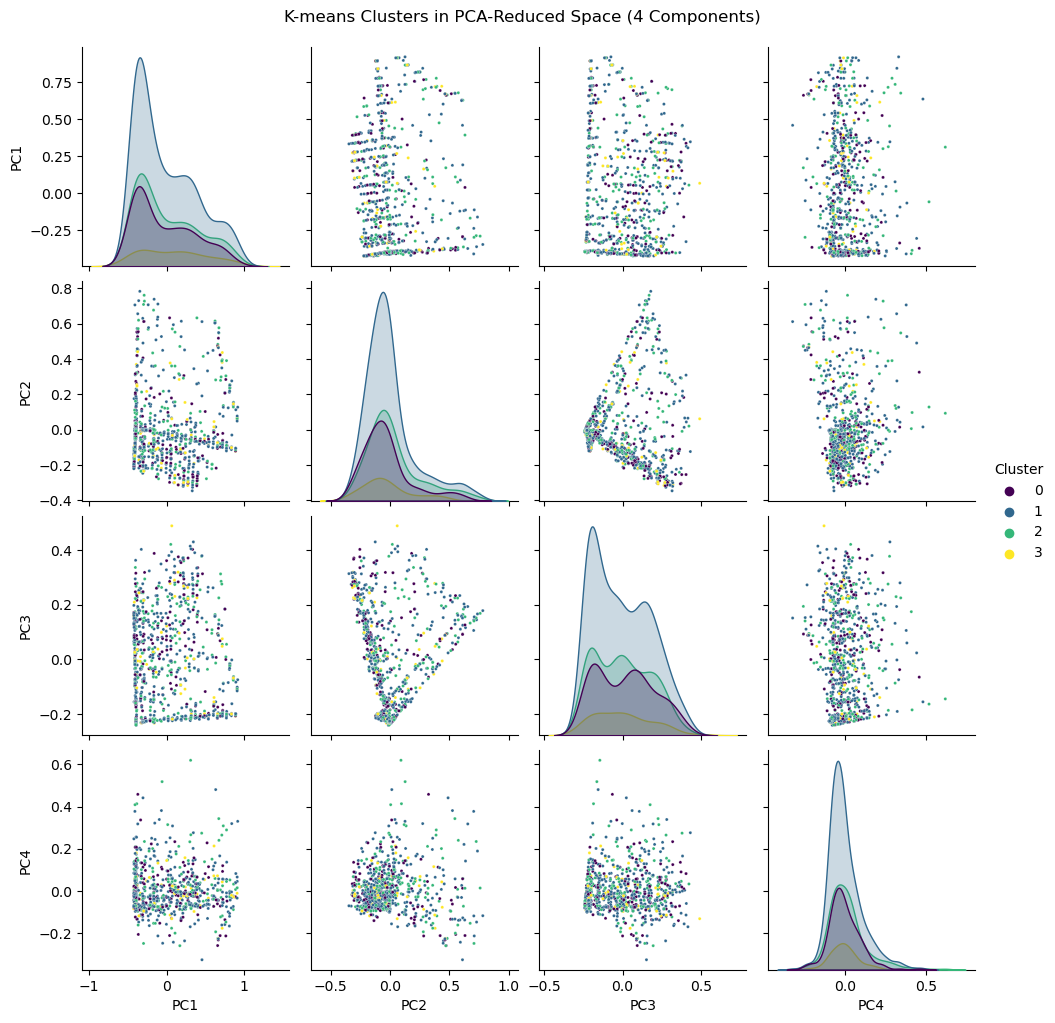

In [65]:
pca_df = pca_columns.join(df2['Cluster'])

# Now you can create the pairplot
sns.pairplot(pca_df, hue='Cluster', palette='viridis', plot_kws={'s': 5})
plt.suptitle('K-means Clusters in PCA-Reduced Space (4 Components)', y=1.02)
plt.show()

old version below

In [ ]:
labels, counts = np.unique(kmeans_labels, return_counts = True)

plt.figure(figsize = (8,6))
plt.title('Quantity of Each Cluster', size = 16)
plt.bar(labels, counts)
plt.xlabel('Cluster', size = 14)
plt.ylabel('Customers', size = 14)
plt.xticks(labels)
plt.show()

for i in zip(labels, counts):
    print('Cluster %s: %s' %(i[0],i[1]))

In [ ]:
loadings = pca.components_

# Create a DataFrame with the loadings
loadings_df = pd.DataFrame(loadings, columns=df1.columns, index=[f'PC{i+1}' for i in range(len(loadings))])
print(loadings_df)

In [ ]:
pca_columns.columns

In [ ]:
final_data = pca_columns[['PC1', 'PC2', 'PC3', 'PC4']].copy()
final_data['Label'] = kmeans_labels

final_data.head()

In [ ]:
# Calculate mean values of each feature by cluster
cluster_summary = final_data.groupby('Label').mean()

cluster_summary_df = cluster_summary.reset_index()
print(cluster_summary_df)

In [ ]:
for i in range(4):
    print('Cluster:', i)
    display(final_data[final_data['Label'] == i].describe())
    print('\n')

In [ ]:
final_data.describe()

In [ ]:
sns.boxplot(final_data)

In [ ]:
# Assuming `pca_data` is your PCA-transformed data and `kmeans` is the K-means model
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=[f'PC{i+1}' for i in range(4)])
cluster_centroids.index.name = 'Cluster'

# Plot the centroids
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centroids, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cluster Centroids in PCA Component Space")
plt.show()

In [76]:
pca_means = data_pca.mean()


In [ ]:
# 计算每个cluster的PCA成分均值与总体均值的差值
difference_from_avg = cluster_centroids - pca_means
print("Difference from Overall PCA Component Means:\n", difference_from_avg)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 可视化每个cluster与PCA成分总体均值的差值
plt.figure(figsize=(10, 6))
sns.heatmap(difference_from_avg, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Difference of Cluster Centroids from Overall PCA Component Means")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

loadings = pd.DataFrame(pca.components_, columns=df1.columns, index=[f'PC{i+1}' for i in range(4)])

plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title("Principal Component Loadings")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# 假设 cluster_centroids 是包含每个簇在各个PCA成分上的均值的DataFrame
# cluster_centroids.columns = ['PC1', 'PC2', 'PC3', 'PC4']
# cluster_centroids.index = cluster labels, such as 0, 1, 2, 3

# 使用 bar chart 展示每个簇在不同PCA成分上的均值
difference_from_avg.plot(kind='bar', figsize=(10, 6))

# 添加标题和坐标轴标签
plt.title("Difference from avg PCA Component Values by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Difference from avg PCA Component Value")
plt.legend(title="PCA Components", loc="upper right")
plt.show()